In [8]:
import pandas as pd
import seaborn as sns
from EmergenceDCL import *
import Measures as M
#from FRA import *
#from random import choices

In [10]:
data = pd.read_csv('../Data/output1.csv')

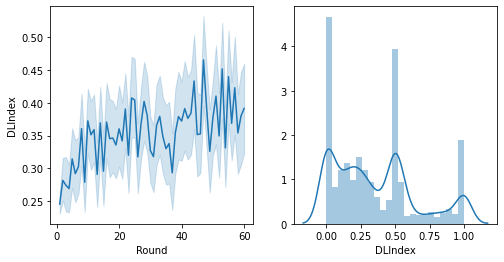

In [14]:
fig=plt.figure(figsize=(8, 4))
ax=plt.subplot(1,2,1)
sns.lineplot(x='Round', y='DLIndex', data=data)
ax=plt.subplot(1,2,2)
sns.distplot(data['DLIndex'])

In [ ]:
from FRA import *
focals, strategies = create_regions_and_strategies(8)

In [ ]:
def Focal(r):
    return 1 if r != 'RS' else 0

def I(r, f):
    return 1 if r == f else 0

def probabilities(region, score, parameters, regionsCoded, DEB=False):
    
    bias = parameters[0]
    alpha = parameters[1]
    beta = parameters[2]
    gamma = parameters[3]
    tolerancia = 9
    r = classify_region(region, regionsCoded, tolerancia)
    n = numberRegion(r)
    if DEB:
        print("Region:", r, "Number:", n)
    
    if n > 0:
        attracts = [0] + [(bias + alpha * sigmoid(score, beta, gamma)) * I(n, i) for i in range(1,9)]
        attracts[0] = 1 - sum(attracts)
    else:
        attracts = [0.76, 0.07, 0.08, 0.02, 0.02, 0.02, 0.02, 0.01, 0.0]
    return attracts


In [ ]:
region = code2Vector(shaky_hand(strategies[2],0), 8)
imprime_region(region)

In [ ]:
parameters = [0.76398169, 1, 0.70608277, 33.60850005]
p = probabilities(region, -64, parameters, focals, DEB=True)
print(p)

In [ ]:
for i in range(100):
    print(choices(range(9), weights=p), end=", ")

In [ ]:
def estimate_strategy(region, score, overlap, pars, focals, DEB=False):
    parameters = [0.764, 1, 0.706, 33.61]
    bias = parameters[0]
    alpha = parameters[1]
    beta = parameters[2]
    gamma = parameters[3]
    tolerancia = 5
    r = classify_region(region, regionsCoded, tolerancia)
    n = numberRegion(r)
    if DEB:
        print("Region:", r, "Number:", n)
    
    if n > 0:
        attracts = [0] + [bias + alpha * sigmoid(score, beta, gamma) * I(n, i) for i in range(1,9)]
        attracts[0] = 1 - sum(attracts)
    else:
        attracts = [0.76, 0.07, 0.08, 0.02, 0.02, 0.02, 0.02, 0.01, 0.0]
    return choices(range(9), weights=p)